## Privacy Preserving k-means

Data privacy is an extremely sensitive topic which requires a selection of methods/techniques when processing or using individuals data. Some new approaches to this involve the creation of synthetic data or the move away from sharing any individuals data at all to a single central data source. This second approach involves processing data at source and sharing only the key information centrally. This can mean processing data within a device, or at a central source (i.e. within a single study) and then sharing only the key information that is needed about that data. This section will discuss how information could be shared in this case between studies to gain a central cluster without passing on any individuals data from one study to another. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
import array

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')

In [3]:
data

,Unnamed: 0,index,Deck_A,Deck_B,Deck_C,Deck_D,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff
0,0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150,1
1,1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675,1
2,2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750,1
3,3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525,1
4,4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300,2
613,94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150,2
614,95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450,2
615,96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200,2


#### Clustering by study

We cluster each study individually with k=3 and display these clusters below

In [4]:
Fridberg = data[data['Study']=='Fridberg']
Horstmann = data[data['Study']=='Horstmann']
Kjome = data[data['Study']=='Kjome']
Maia = data[data['Study']=='Maia']
SteingroverInPrep = data[data['Study']=='SteingroverInPrep']
Premkumar = data[data['Study']=='Premkumar']
Wood = data[data['Study']=='Wood']
Worthy = data[data['Study']=='Worthy']
Steingroever2011 = data[data['Study']=='Steingroever2011']
Wetzels = data[data['Study']=='Wetzels']

l = [Fridberg, Horstmann, Kjome, Maia, SteingroverInPrep, Premkumar, Wood, Worthy, Steingroever2011, Wetzels]

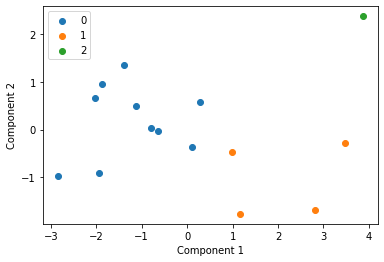

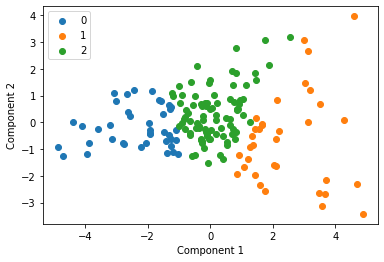

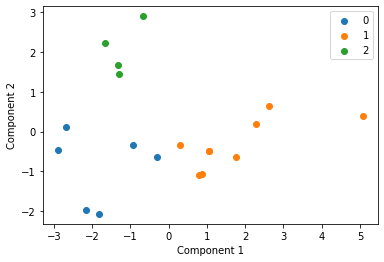

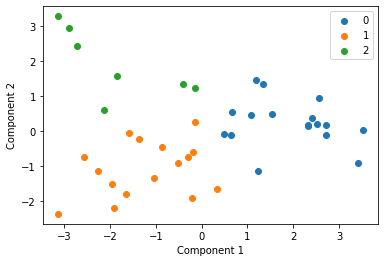

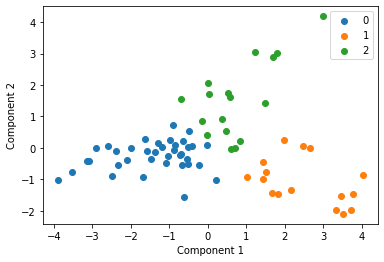

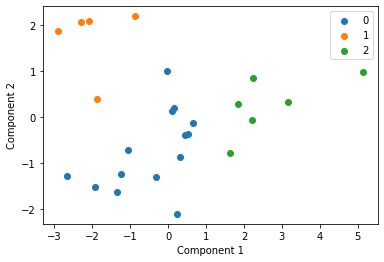

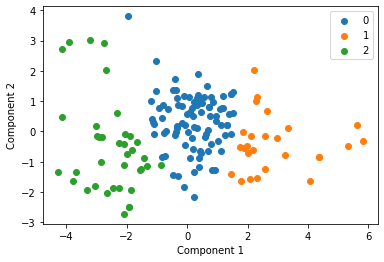

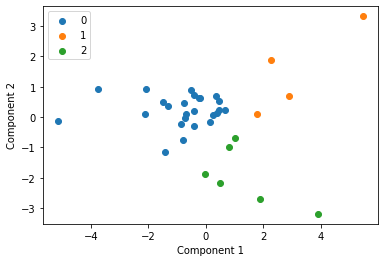

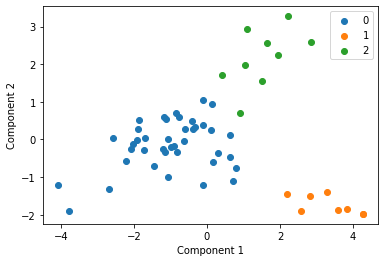

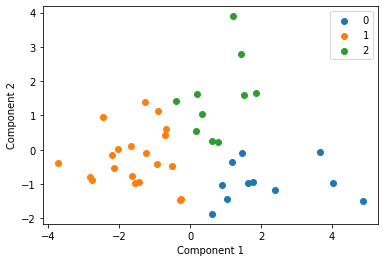

In [5]:
clusters = []
labels = []
for s in l:
    df = s.drop(columns=['index', 'Subj', 'Study', 'Unnamed: 0', 'Unique_ID', 'balance'])

    scaler = preprocessing.StandardScaler().fit(df)
    X_scaled = scaler.transform(df)

    #rename columns to clearly represent decks
    sd = pd.DataFrame(X_scaled, columns=['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'tot_win', 'tot_los', 'Payoff'])
    sd

    pca = PCA(2)
    df = pca.fit_transform(sd)

    #w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
    #w_out_payoff = sd.drop(columns=["Payoff"])

    #w_out = pca.fit_transform(w_out_payoff)

    kmeans = KMeans(n_clusters= 3)
 
    #predict the labels of clusters.
    label = kmeans.fit_predict(df)
    for v in label:
        labels.append(v)
 
    #Getting unique labels
    u_labels = np.unique(label)

    centroids = kmeans.cluster_centers_
    clusters.append(centroids)
    
    #plotting the results:
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.legend()
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

#### Centroid collection

We make a list called clusters above, with all of the centroids for each of the studies and plot these all together in the next cell. This gives an indication of each studies data distribution without providing any raw data centrally.

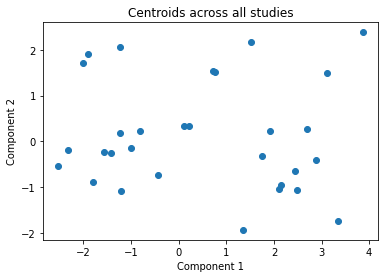

In [6]:
arr = np.vstack(clusters)
plt.scatter(arr[:,0], arr[:,1])
plt.title("Centroids across all studies")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

#### Final clustering

We then cluster these centroids to see what our final distribution is like

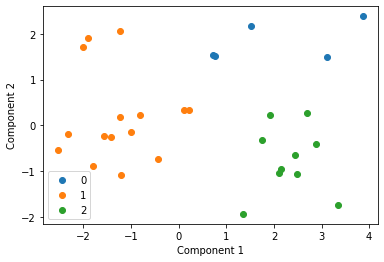

In [7]:
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(arr)
 
#Getting unique labels
u_labels = np.unique(label)

    
#plotting the results:
for i in u_labels:
    plt.scatter(arr[label == i , 0] , arr[label == i , 1] , label = i)
plt.legend()
#plt.title()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
 

## Analysis

This is an incredibly simplistic and naive method of privacy preserving clustering. The use of centroids causes issues as some centroids will have been created with very few points and others with a large number of data points and hence the clustering will be quite poor in comparison to the original clustering effort. Some more work would need to be done to explore a better way of protecting individuals privacy while allowing us to centrally analyse our data using k-means.